In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import csv


# Data gathering and cleansing


In [2]:
#CSV file paths
accident_path = "project_data/accident_df.csv"
main_csv_path = "project_data/proj_accident_main.csv"


#creating dataframes 
main_df = pd.read_csv(main_csv_path)
accident_df = pd.read_csv(accident_path)


#remove first column
main_df = main_df.drop(main_df.columns[0], axis=1)
accident_df = accident_df.drop(accident_df.columns[0], axis=1)

#creating a new dataframe, which only includes accidents from 2016-2020
main_accident_df = accident_df[accident_df["ACCIDENT_NO"].isin(main_df["ACCIDENT_NO"])]
#converting accidentdate column to datetime format, for easier search
main_df["ACCIDENTDATE"] = pd.to_datetime(main_df["ACCIDENTDATE"])
main_accident_df["ACCIDENTDATE"] = pd.to_datetime(main_accident_df["ACCIDENTDATE"])
main_accident_df.head(5)

,ACCIDENT_NO,ACCIDENTDATE,ACCIDENTTIME,ACCIDENT_TYPE,Accident Type Desc,DAY_OF_WEEK,Day Week Description,DCA_CODE,DCA Description,DIRECTORY,...,NO_PERSONS_INJ_2,NO_PERSONS_INJ_3,NO_PERSONS_KILLED,NO_PERSONS_NOT_INJ,POLICE_ATTEND,ROAD_GEOMETRY,Road Geometry Desc,SEVERITY,SPEED_ZONE,SEVERITY_DESC
0,T20160000013,2016-01-01,00:07:00,2,Struck Pedestrian,6,Friday,103,PED PLAYING/LYING/WORKING/STANDING ON CARRIAGE...,MEL,...,1,0,0,1,1,5,Not at intersection,2,60,Serious injury accident
1,T20160000015,2016-01-01,02:35:00,4,Collision with a fixed object,6,Friday,171,LEFT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICL...,VCS,...,1,0,0,0,1,5,Not at intersection,2,80,Serious injury accident
2,T20160000033,2016-01-01,12:30:00,1,Collision with vehicle,6,Friday,134,LANE CHANGE RIGHT (NOT OVERTAKING),MEL,...,1,0,0,1,1,5,Not at intersection,2,80,Serious injury accident
3,T20160000034,2016-01-01,11:00:00,1,Collision with vehicle,6,Friday,120,HEAD ON (NOT OVERTAKING),MEL,...,1,0,0,5,1,5,Not at intersection,2,80,Serious injury accident
4,T20160000038,2016-01-01,13:00:00,4,Collision with a fixed object,6,Friday,183,OFF LEFT BEND INTO OBJECT/PARKED VEHICLE ...,VCS,...,1,0,0,0,1,5,Not at intersection,2,80,Serious injury accident


## Selecting relevant columns 
### I will look into the number of accidents, and the number of people involved in accidents + those peeople injury/death status


In [3]:
# Source data doesn't have a number of people injured column (it splits number of people injured by category), getting the number of people injured by taking the total number of people minus deaths + "not injured"
main_accident_df["NO_PERSONS_INJ"] = main_accident_df["NO_PERSONS"] - main_accident_df["NO_PERSONS_KILLED"] - main_accident_df["NO_PERSONS_NOT_INJ"]
main_accident_df = main_accident_df[["ACCIDENT_NO","ACCIDENTDATE","NO_PERSONS","NO_PERSONS_KILLED","NO_PERSONS_NOT_INJ","NO_PERSONS_INJ"]]
main_accident_df.head(5)

,ACCIDENT_NO,ACCIDENTDATE,NO_PERSONS,NO_PERSONS_KILLED,NO_PERSONS_NOT_INJ,NO_PERSONS_INJ
0,T20160000013,2016-01-01,2,0,1,1
1,T20160000015,2016-01-01,1,0,0,1
2,T20160000033,2016-01-01,2,0,1,1
3,T20160000034,2016-01-01,6,0,5,1
4,T20160000038,2016-01-01,1,0,0,1


# Creating summary table 
### grouping accident data by year
### getting statistics such as number of accidents, sum of accidents, and ratios
### note 2020 data is incomplete (stops at november), however I am still including 2020 out of interest, but 2020 data cannot be used to predict trends as it's incomplete, however we can still observe any interesting patterns or facts

In [4]:
#creating summary table
#sum_df_years = sum_df_years.drop(sum_df_years.index[-1]) #drop last row (2020)
#sum_df_years["Number_of_accidents"][2016]

sum_df_years = pd.DataFrame()
sum_df_years["Number_of_accidents"] = main_accident_df.groupby(main_accident_df["ACCIDENTDATE"].dt.year, as_index=True)["ACCIDENT_NO"].count()
sum_df_years["Persons"] = main_accident_df.groupby(main_accident_df["ACCIDENTDATE"].dt.year, as_index=True)["NO_PERSONS"].sum()
sum_df_years["Deaths"] = main_accident_df.groupby(main_accident_df["ACCIDENTDATE"].dt.year, as_index=True)["NO_PERSONS_KILLED"].sum()
sum_df_years["Not_injured"] = main_accident_df.groupby(main_accident_df["ACCIDENTDATE"].dt.year, as_index=True)["NO_PERSONS_NOT_INJ"].sum()
sum_df_years["Injured"] = main_accident_df.groupby(main_accident_df["ACCIDENTDATE"].dt.year, as_index=True)["NO_PERSONS_INJ"].sum()
sum_df_years["mean_people_injured"] = main_accident_df.groupby(main_accident_df["ACCIDENTDATE"].dt.year, as_index=True)["NO_PERSONS_INJ"].mean()
sum_df_years["mean_people_death"] = main_accident_df.groupby(main_accident_df["ACCIDENTDATE"].dt.year, as_index=True)["NO_PERSONS_KILLED"].mean()

sum_df_years


,Number_of_accidents,Persons,Deaths,Not_injured,Injured,mean_people_injured,mean_people_death
ACCIDENTDATE,,,,,,,
2016,15852,37629,290,17738,19601,1.236500,0.018294
2017,13393,32329,259,15293,16777,1.252669,0.019338
2018,12797,30810,211,14668,15931,1.244901,0.016488
2019,14164,34056,263,15975,17818,1.257978,0.018568
2020,6060,13589,150,6026,7413,1.223267,0.024752


# Accident analysis

## number of accidents per year

Shows the number of accidents recorded by vicroads per year.
There was a downwards trend from 2016 - 2018, but a big spike upwards in 2019. 2020 results are an anomoly (incomplete + covid) but still included for reference.

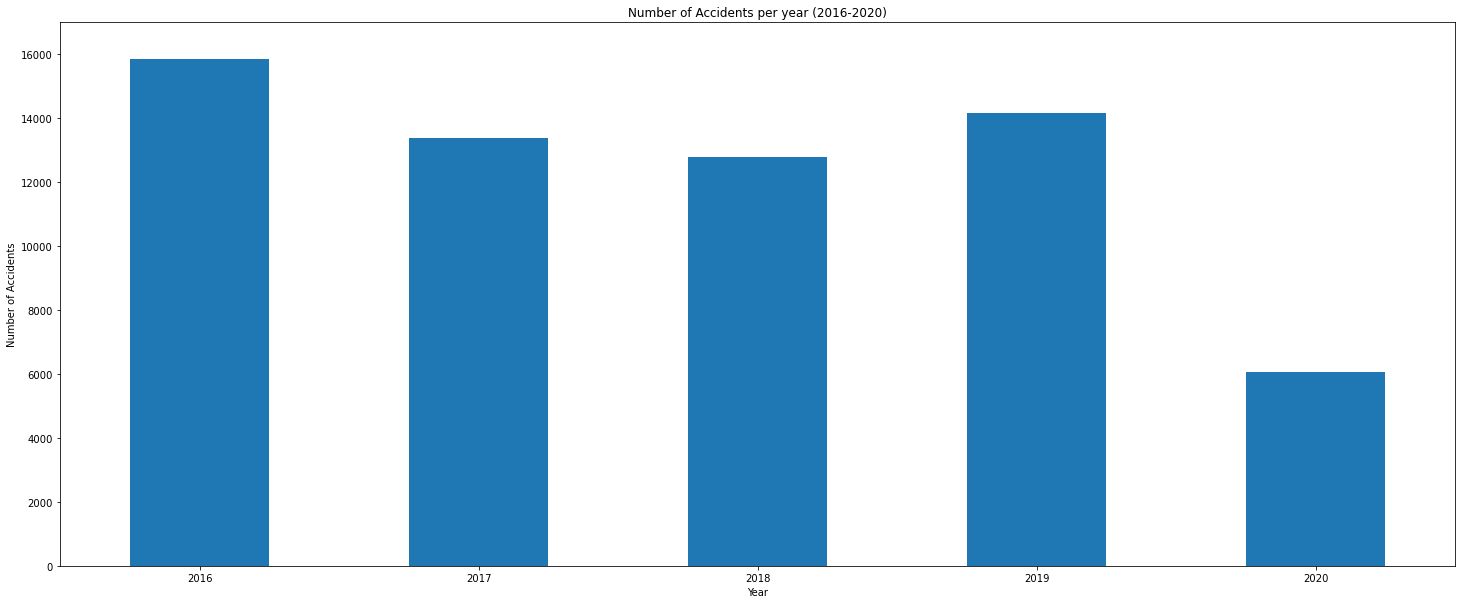

In [64]:
plt.figure(figsize=(25, 10))
sum_df_years["Number_of_accidents"].plot(kind="bar")
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Number of Accidents per year (2016-2020)")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")

plt.ylim(0,17000)
plt.savefig("project_output/accidents_per_year.png")



## People in Accidents and thier injury status (2016-2020)

Graph visually demonstrates that the ratio of people getting injured, not injured, or death is around the same every year - slightly more people are injured in an accident than not, and only a small percentage of people die in accidents.
Note despite 2020 data being incomplete and the number of accidents are low (thus subject to more variance), the death and injury ratio is higher than any other year, interesting... 

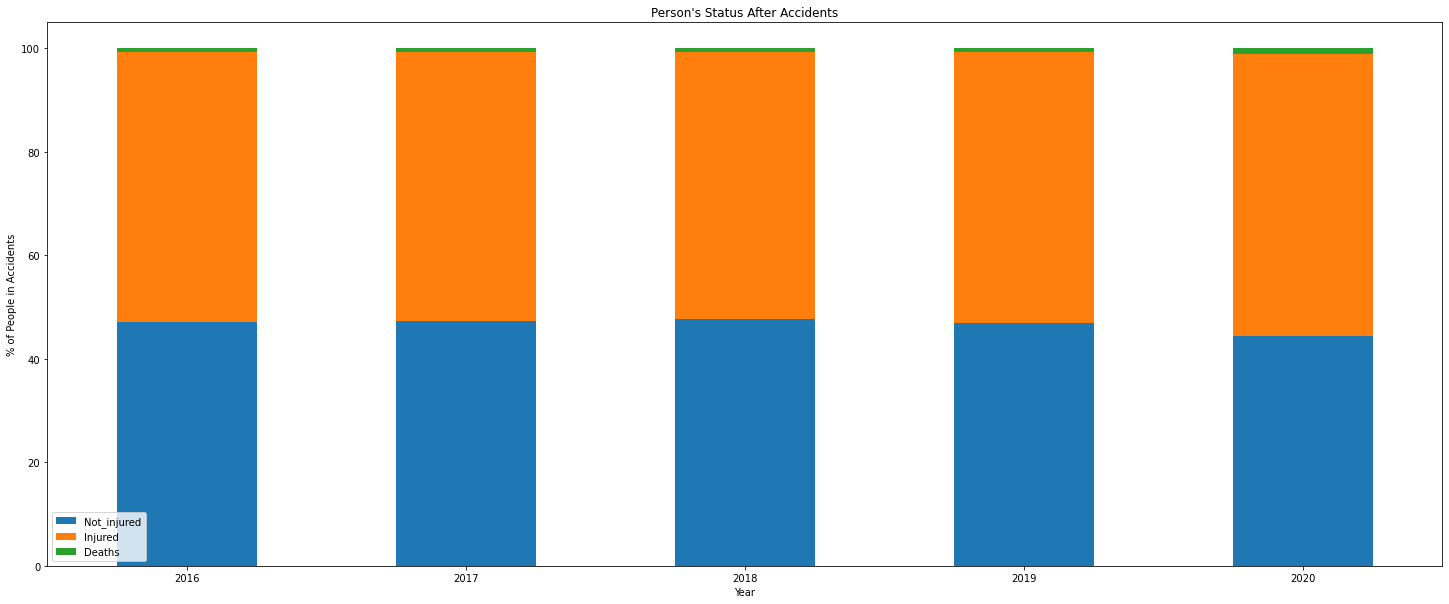

In [16]:


#creating a new DF which determines the percentage of people's status' (death,injured,not injured) 
ratio_people = sum_df_years[["Not_injured","Injured","Deaths"]].apply(lambda x: x*100/sum(x), axis=1)
ratio_people[["Not_injured","Injured","Deaths"]].plot(kind="bar", stacked=True, figsize=(25,10))
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Person's Status After Accidents")
plt.xlabel("Year")
plt.ylabel("% of People in Accidents")
plt.savefig("project_output/test.png")


## People in accidents per year and thier status (quantitative)

visually demonstrating that every year number of accidents are always lower than the number  of people involved in the accident (either injured, not injured, or dead). 
note as established in the previous chart, you are more likely to be injured in an accident than not injured
2020 data is interesting as there was more accidents than people not injured

<Figure size 1800x720 with 0 Axes>

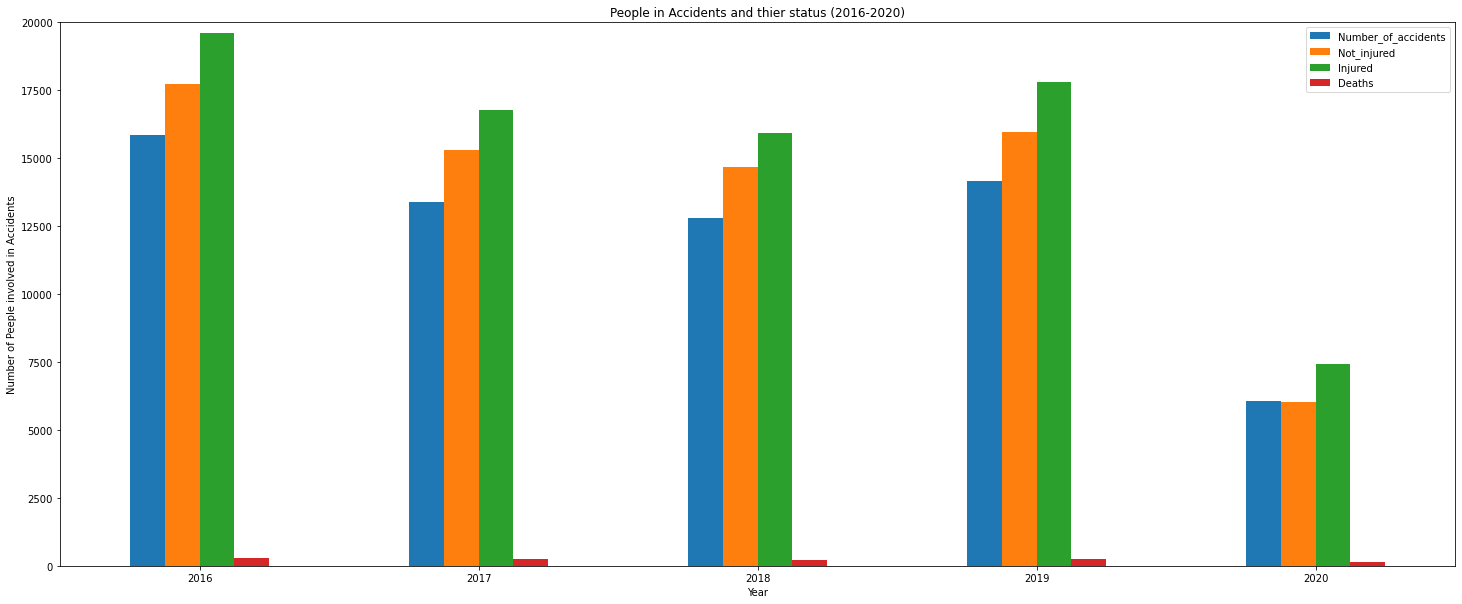

In [66]:
plt.figure(figsize=(25, 10))
sum_df_years[["Number_of_accidents","Not_injured","Injured","Deaths"]].plot(kind="bar", stacked=False, figsize=(25,10))
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("People in Accidents and thier status (2016-2020)")
plt.xlabel("Year")
plt.ylabel("Number of Peeple involved in Accidents")

plt.ylim(0,20000)
plt.savefig("project_output/accidents_per_year1.png")

## Number of deaths

follows the same pattern as number of accidents, which further supports the ratio chart (around the same percentage of people are injured, not injured, or dead per accident)

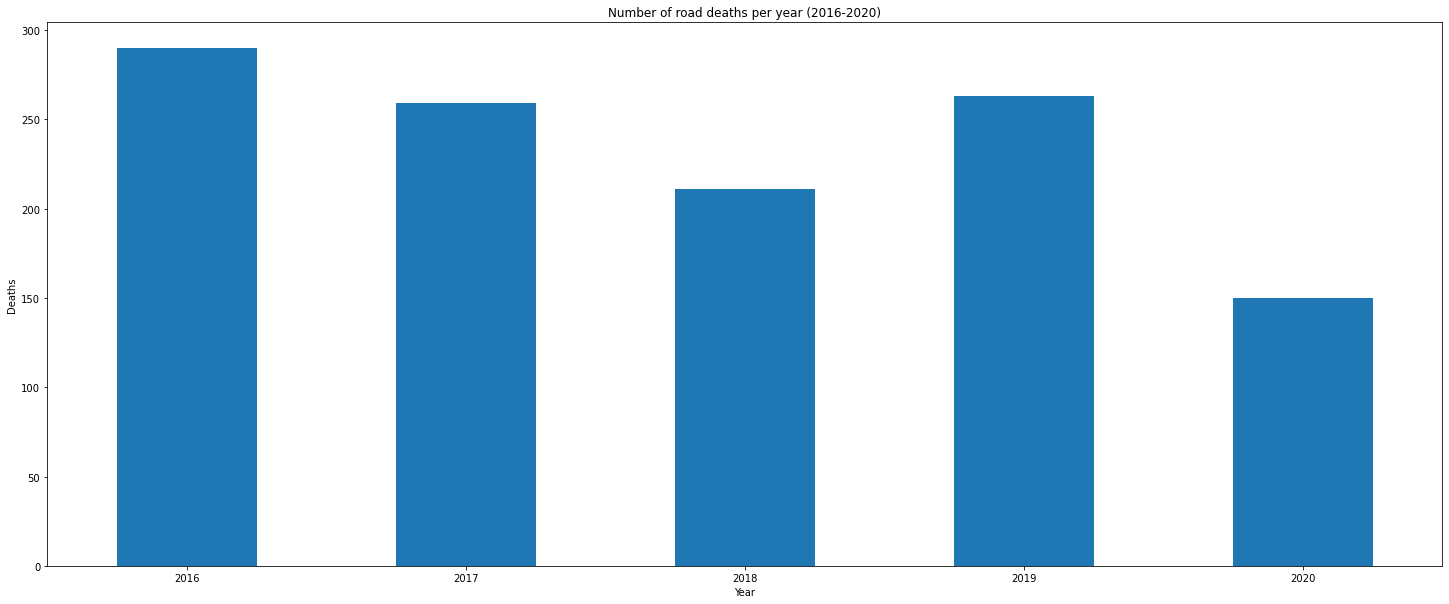

In [9]:
plt.figure(figsize=(25, 10))
sum_df_years["Deaths"].plot(kind="bar")
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Number of road deaths per year (2016-2020)")
plt.xlabel("Year")
plt.ylabel("Deaths")

plt.savefig("project_output/deaths_per_year.png")

# # Number of injuries

follows the same pattern as number of accidents, which further supports the ratio chart (around the same percentage of people are injured, not injured, or dead per accident)

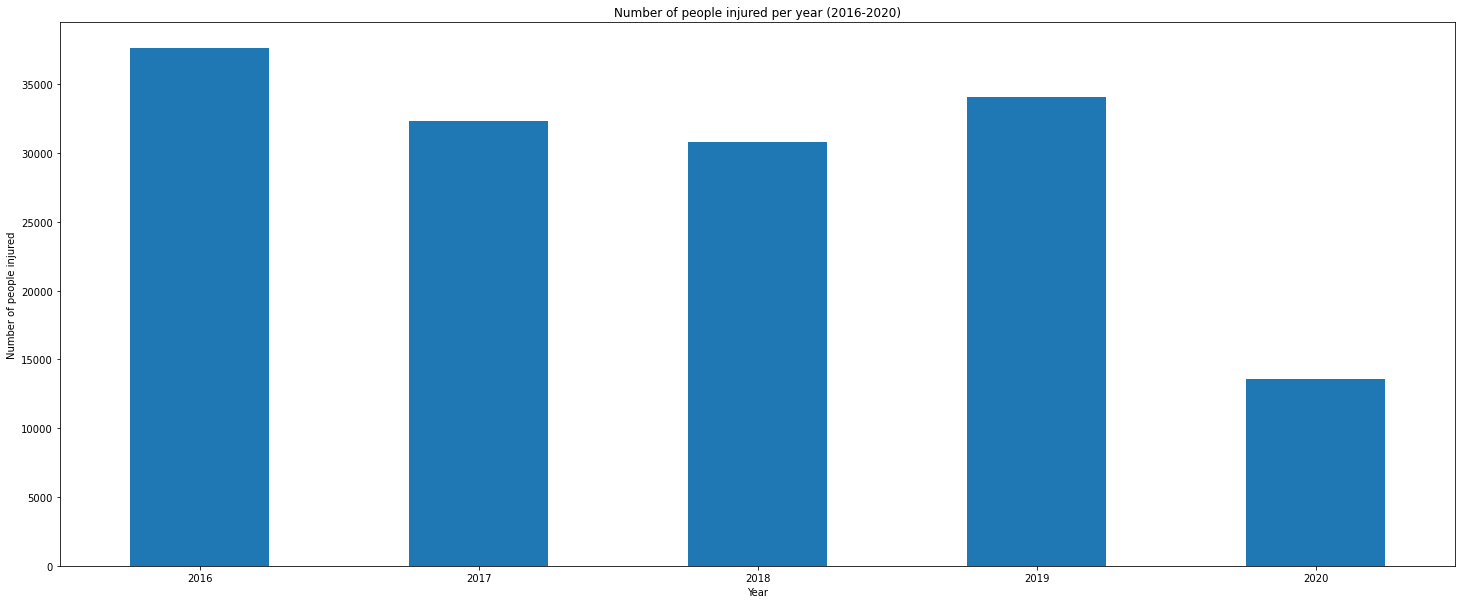

In [10]:
plt.figure(figsize=(25, 10))
sum_df_years["Persons"].plot(kind="bar")
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Number of people injured per year (2016-2020)")
plt.xlabel("Year")
plt.ylabel("Number of people injured")

plt.savefig("project_output/injuries_per_year.png")

# for every accident, how many people are injured

negliable difference in values, furhter supporting the ratio of people being injured, not injured or dead per accident

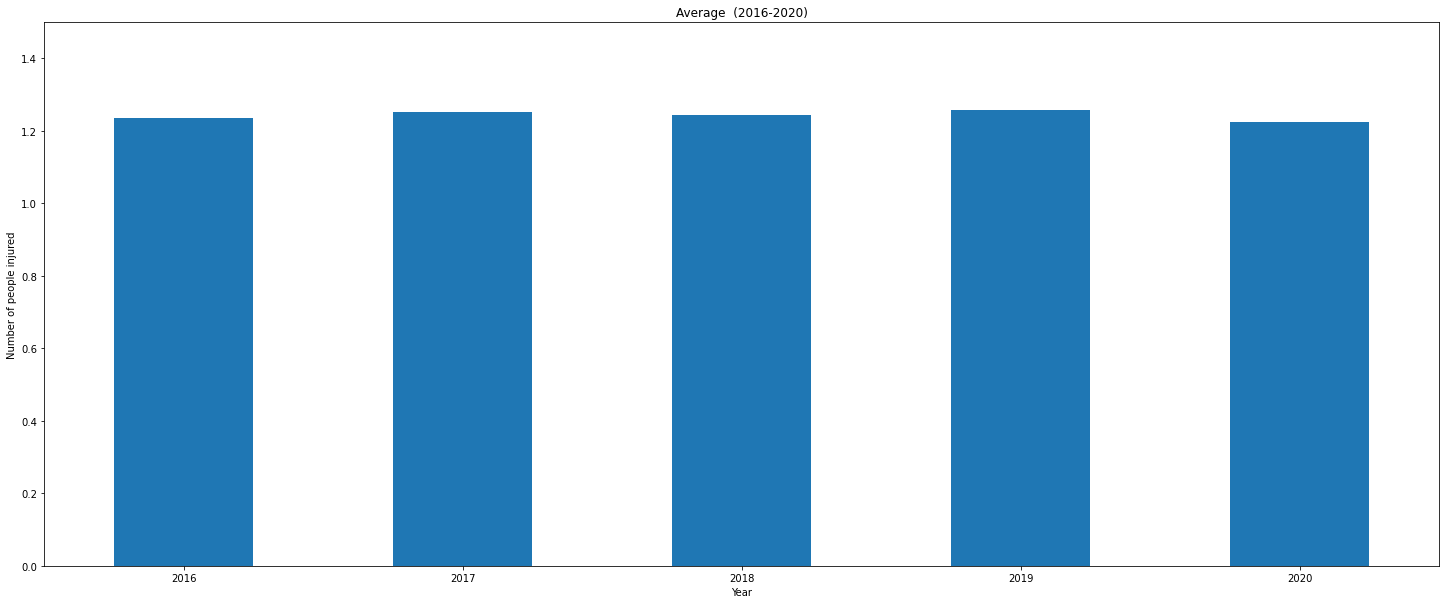

In [11]:
plt.figure(figsize=(25, 10))
sum_df_years["mean_people_injured"].plot(kind="bar")
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Average  (2016-2020)")
plt.xlabel("Year")
plt.ylabel("Number of people injured")
plt.ylim(0,1.5)
plt.savefig("project_output/injuries_per_year.png")

# for every accident, how many people die?

so as noted earlier, 2020 had a big anomoly with people dying in accidents. you were more likely to die if you were in an accident in 2020 when compared to 2016-2019.



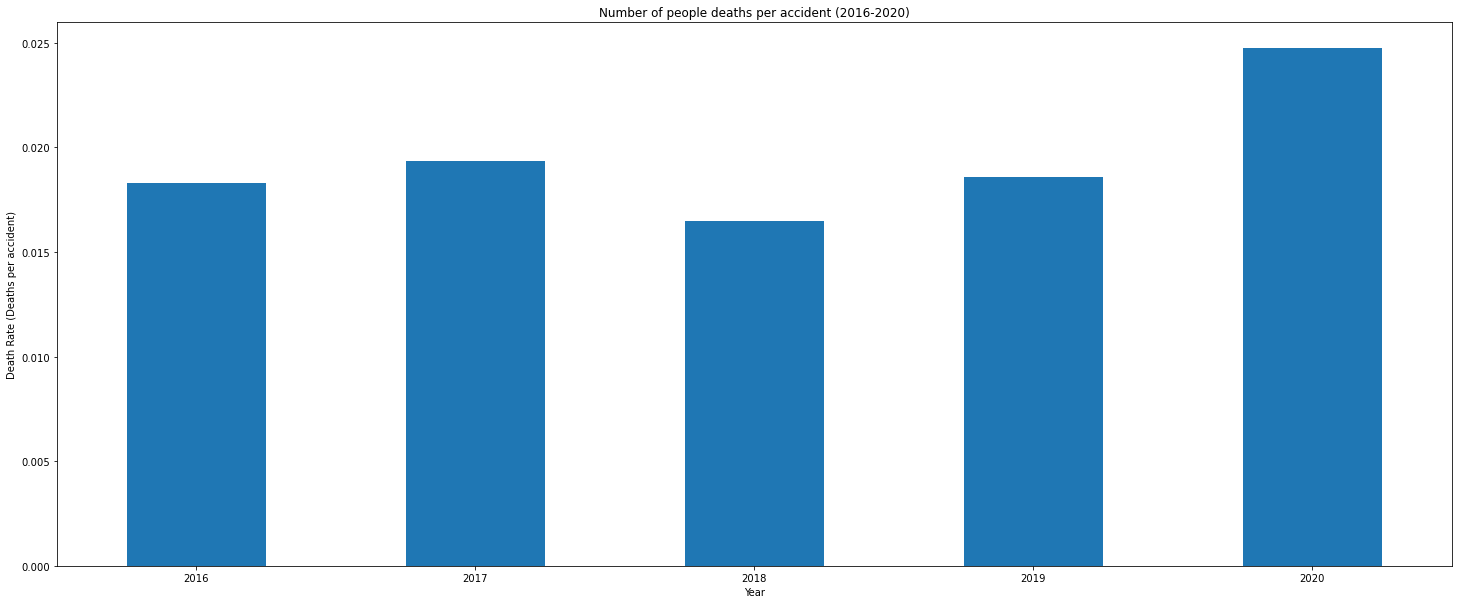

In [12]:
plt.figure(figsize=(25, 10))
sum_df_years["mean_people_death"].plot(kind="bar")
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Number of people deaths per accident (2016-2020)")
plt.xlabel("Year")
plt.ylabel("Death Rate (Deaths per accident)")
plt.savefig("project_output/mean_people_death.png")

# 2016 - 2020 accidents per month


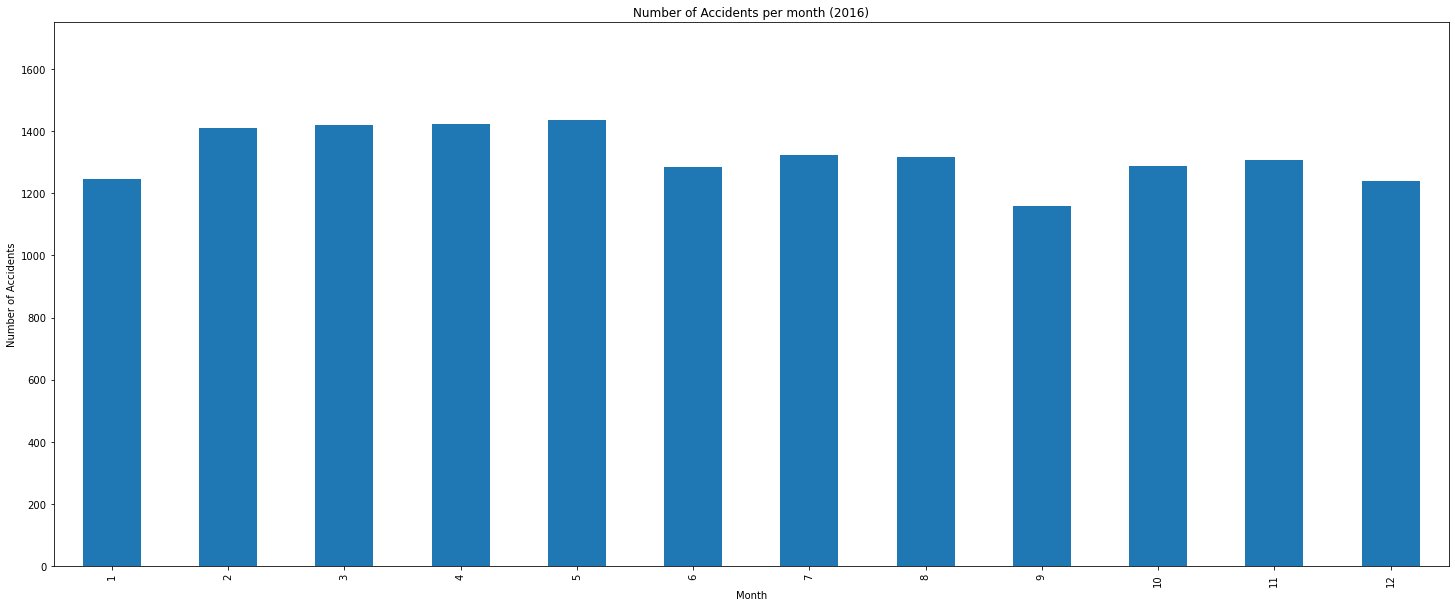

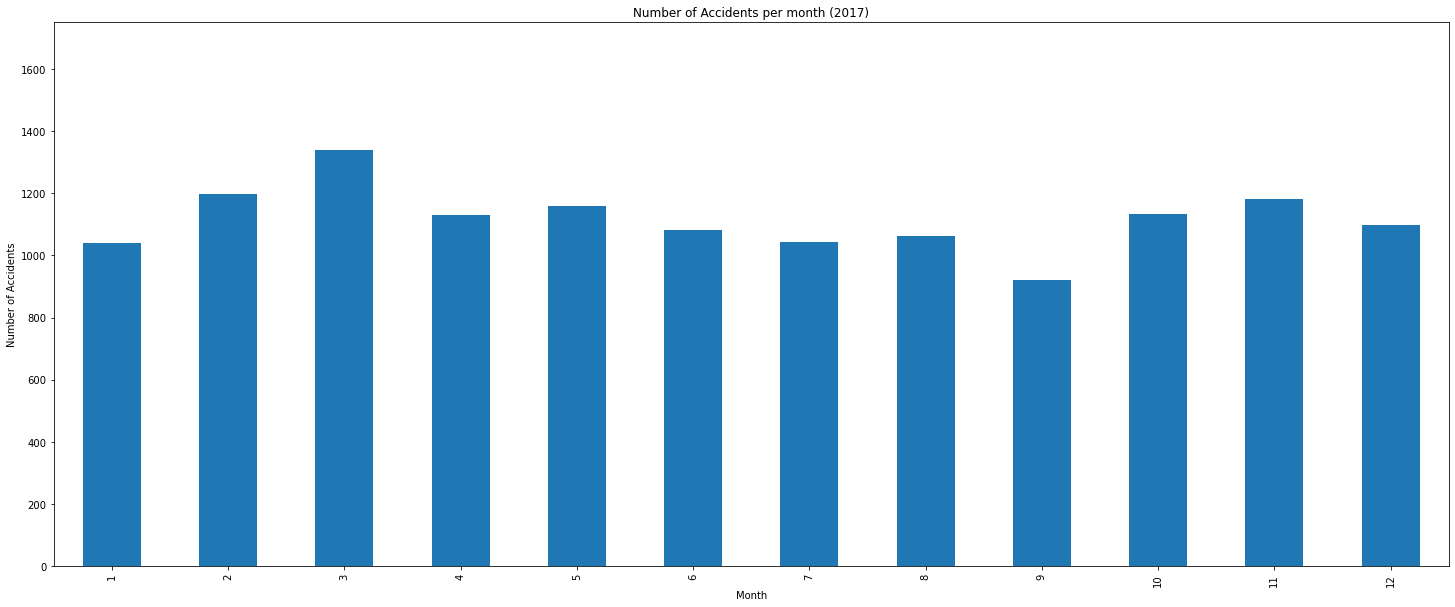

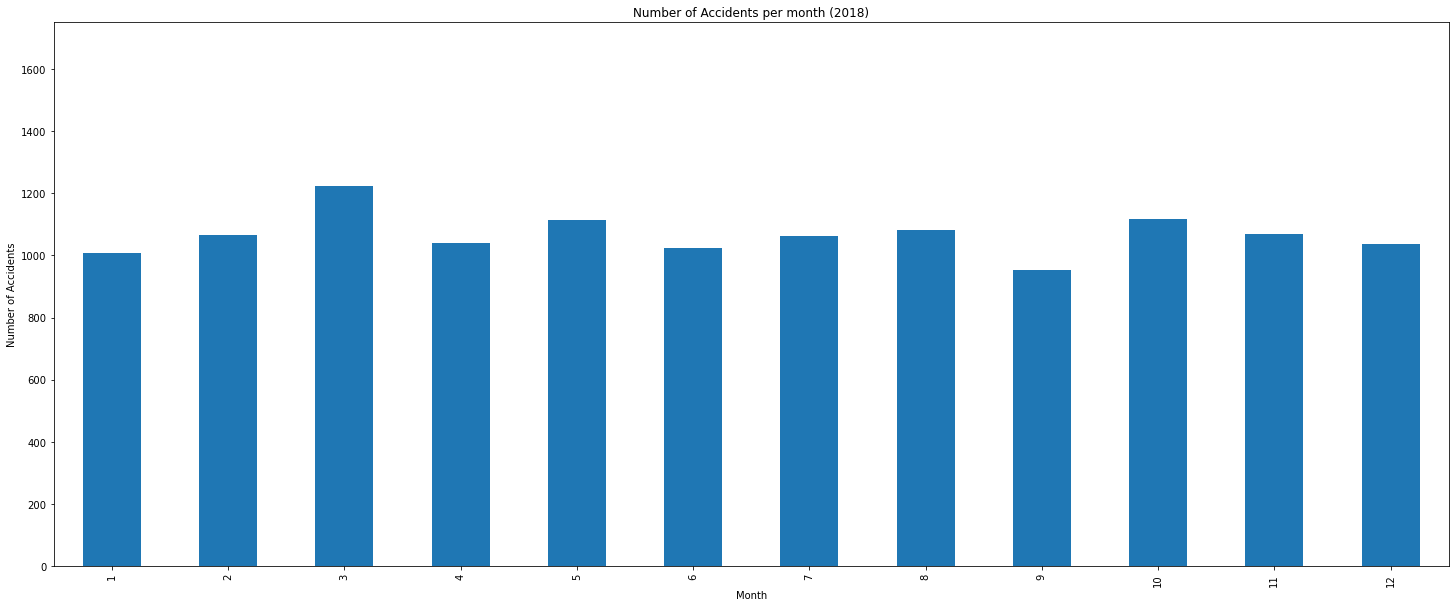

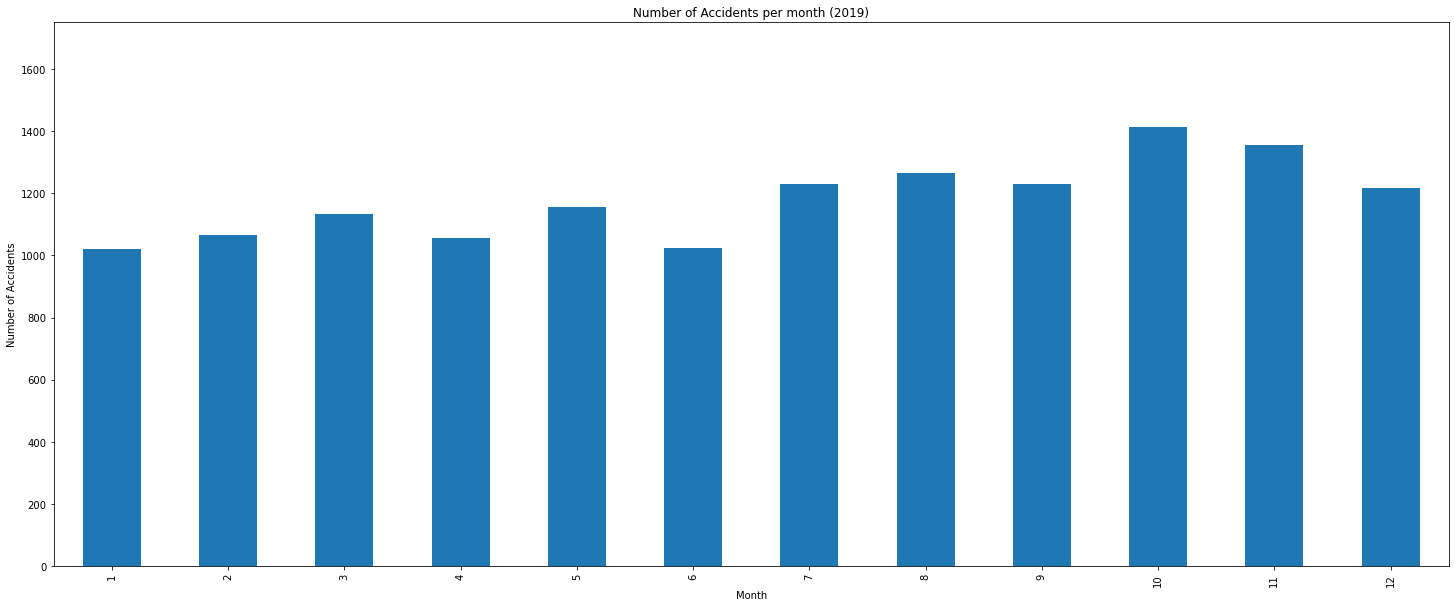

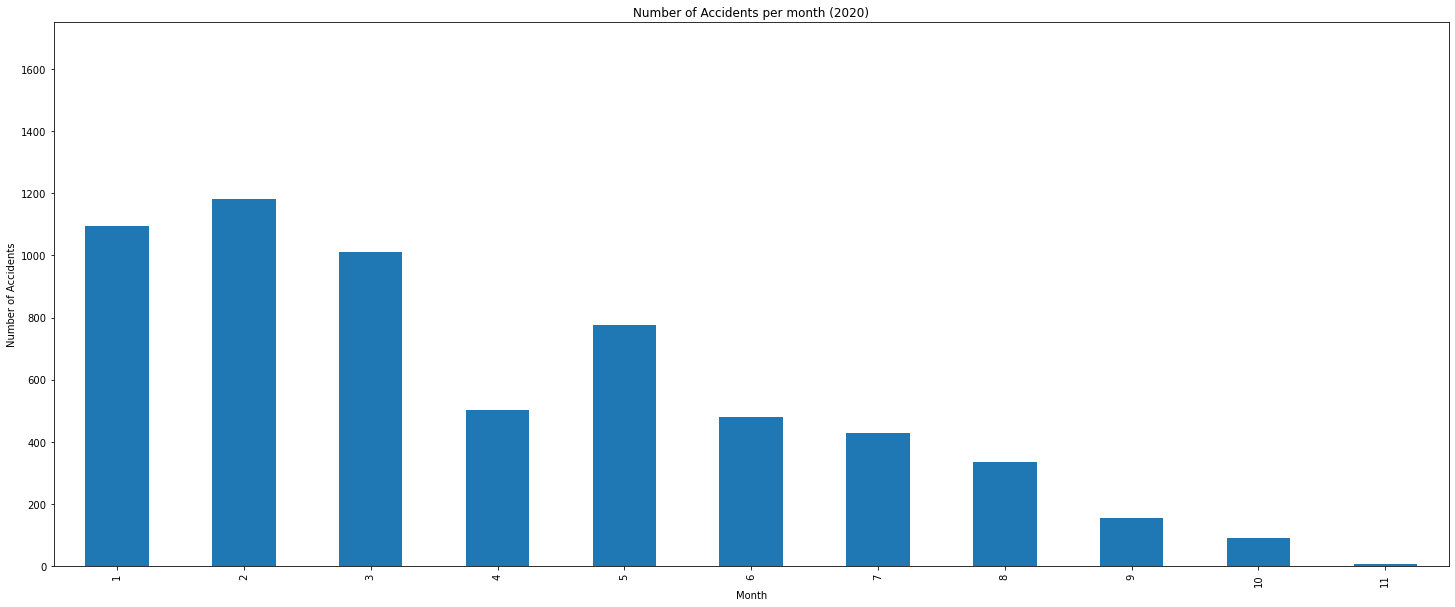

In [63]:
#months 


sum_df_months = pd.DataFrame()
sum_df_months["Number_of_accidents"] = main_accident_df.groupby([main_accident_df["ACCIDENTDATE"].dt.year,main_accident_df["ACCIDENTDATE"].dt.month], as_index=True)["ACCIDENT_NO"].count()
sum_df_months["Number_of_deaths"] = main_accident_df.groupby([main_accident_df["ACCIDENTDATE"].dt.year,main_accident_df["ACCIDENTDATE"].dt.month], as_index=True)["NO_PERSONS_KILLED"].sum()
sum_df_months["Number_of_injuries"] = main_accident_df.groupby([main_accident_df["ACCIDENTDATE"].dt.year,main_accident_df["ACCIDENTDATE"].dt.month], as_index=True)["NO_PERSONS_INJ"].sum()


plt.figure(figsize=(25, 10))
sum_df_months["Number_of_accidents"][2016].plot(kind="bar")
plt.title("Number of Accidents per month (2016)")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.ylim(0,1750)
plt.show()

plt.figure(figsize=(25, 10))
sum_df_months["Number_of_accidents"][2017].plot(kind="bar")
plt.title("Number of Accidents per month (2017)")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.ylim(0,1750)
plt.show()

plt.figure(figsize=(25, 10))
sum_df_months["Number_of_accidents"][2018].plot(kind="bar")
plt.title("Number of Accidents per month (2018)")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.ylim(0,1750)
plt.show()

plt.figure(figsize=(25, 10))
sum_df_months["Number_of_accidents"][2019].plot(kind="bar")
plt.title("Number of Accidents per month (2019)")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.ylim(0,1750)
plt.show()

plt.figure(figsize=(25, 10))
sum_df_months["Number_of_accidents"][2020].plot(kind="bar")
plt.title("Number of Accidents per month (2020)")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.ylim(0,1750)
plt.show()




# 2016 - 2020 people killed per month


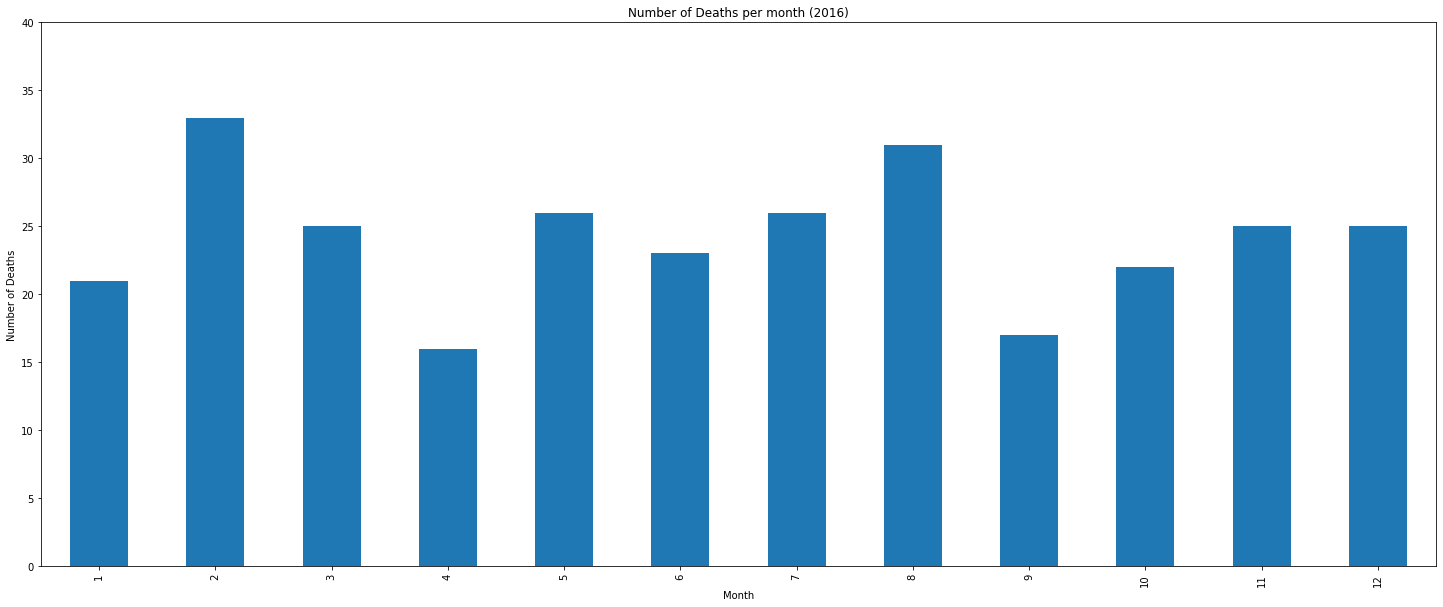

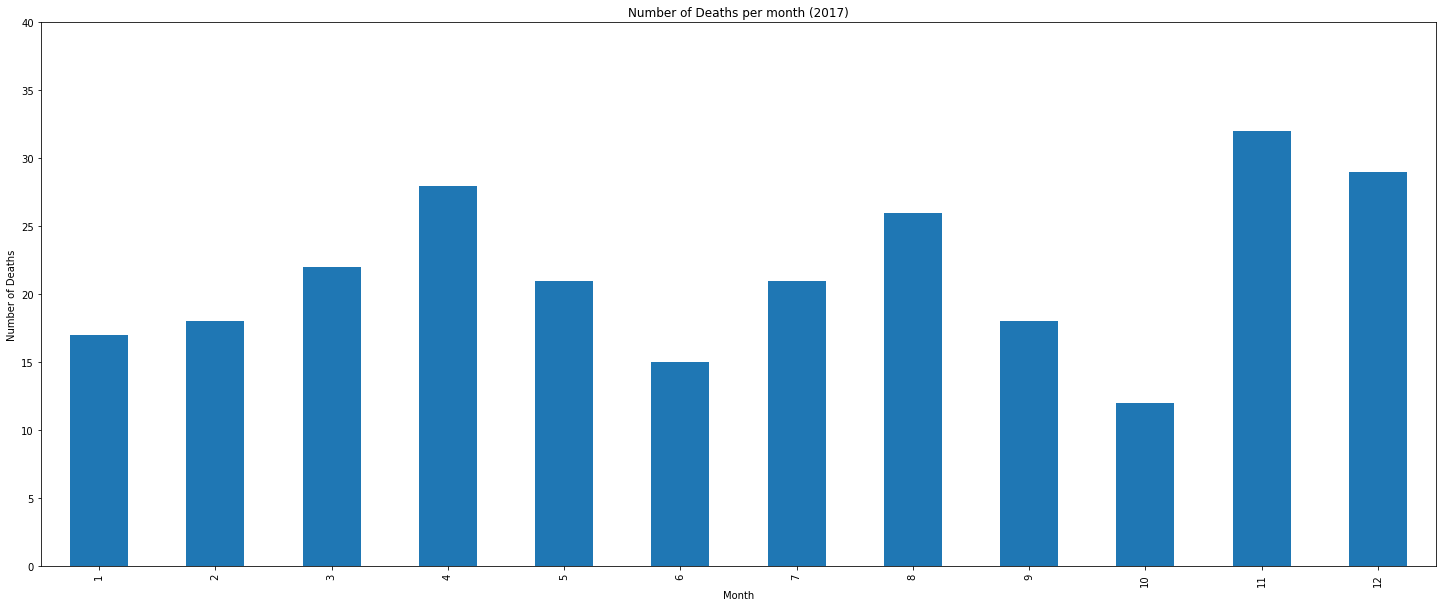

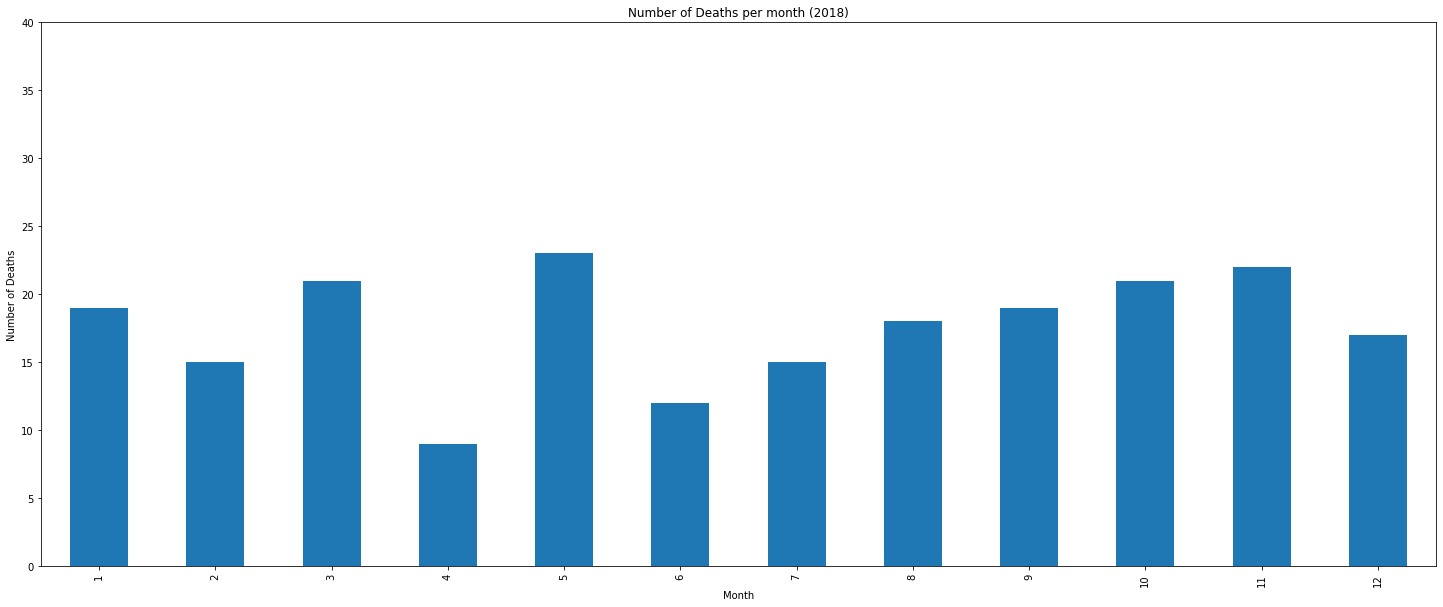

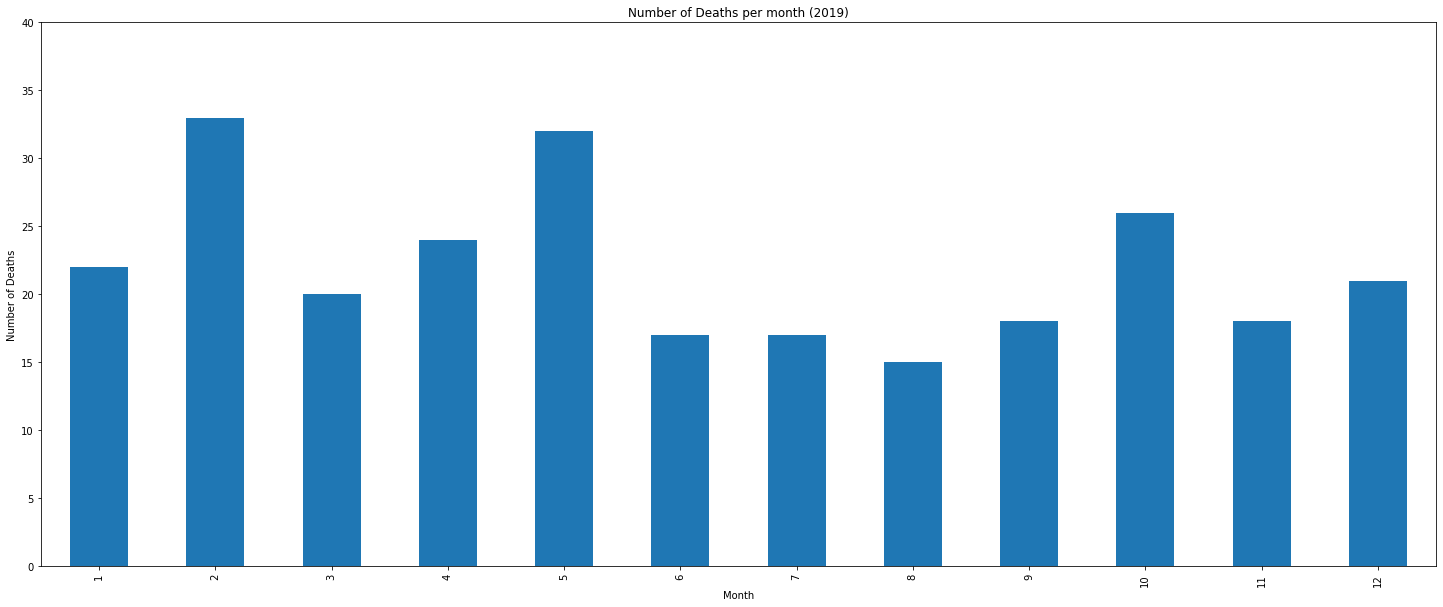

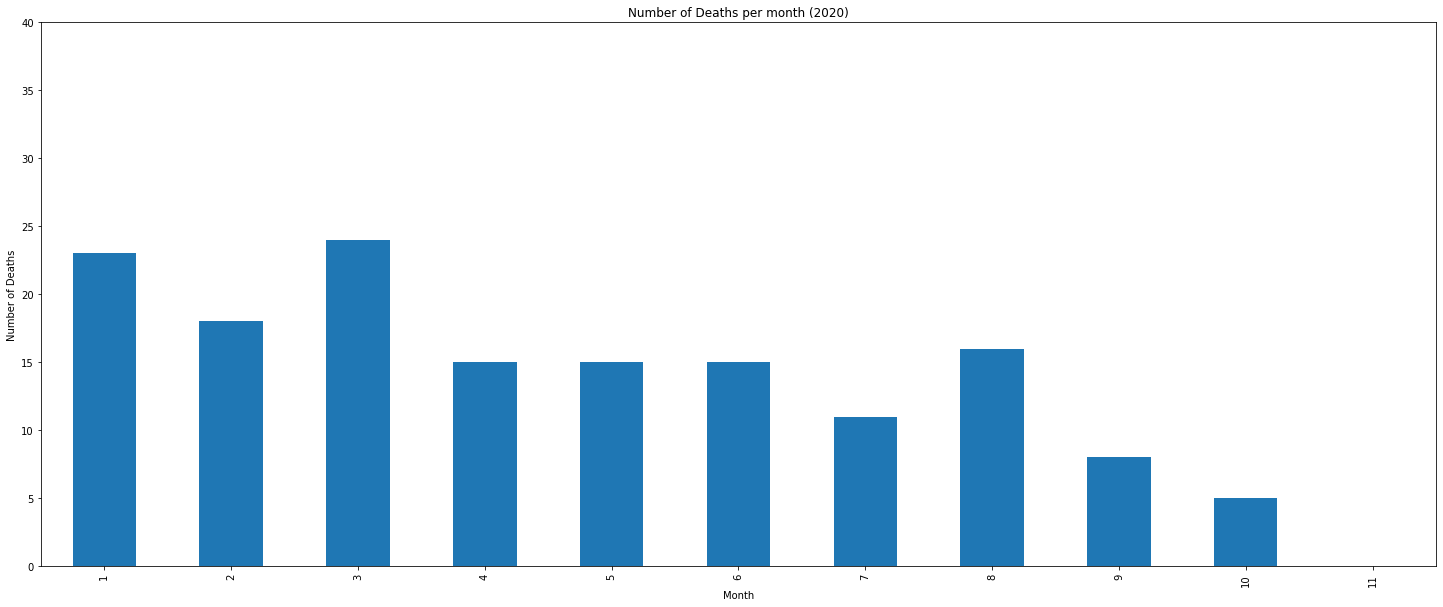

In [19]:


plt.figure(figsize=(25, 10))
sum_df_months["Number_of_deaths"][2016].plot(kind="bar")
plt.title("Number of Deaths per month (2016)")
plt.xlabel("Month")
plt.ylabel("Number of Deaths")
plt.ylim(0,40)
plt.show()

plt.figure(figsize=(25, 10))
sum_df_months["Number_of_deaths"][2017].plot(kind="bar")
plt.title("Number of Deaths per month (2017)")
plt.xlabel("Month")
plt.ylabel("Number of Deaths")
plt.ylim(0,40)
plt.show()

plt.figure(figsize=(25, 10))
sum_df_months["Number_of_deaths"][2018].plot(kind="bar")
plt.title("Number of Deaths per month (2018)")
plt.xlabel("Month")
plt.ylabel("Number of Deaths")
plt.ylim(0,40)
plt.show()

plt.figure(figsize=(25, 10))
sum_df_months["Number_of_deaths"][2019].plot(kind="bar")
plt.title("Number of Deaths per month (2019)")
plt.xlabel("Month")
plt.ylabel("Number of Deaths")
plt.ylim(0,40)
plt.show()

plt.figure(figsize=(25, 10))
sum_df_months["Number_of_deaths"][2020].plot(kind="bar")
plt.title("Number of Deaths per month (2020)")
plt.xlabel("Month")
plt.ylabel("Number of Deaths")
plt.ylim(0,40)
plt.show()





# number of people injured per month

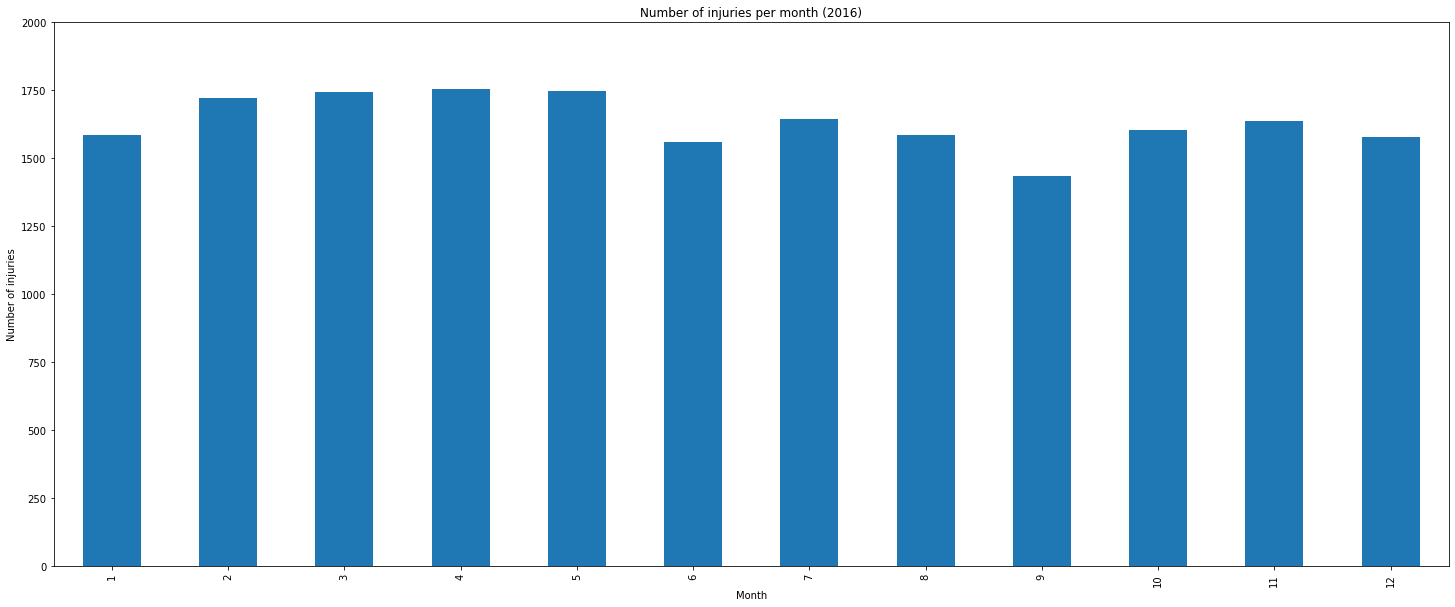

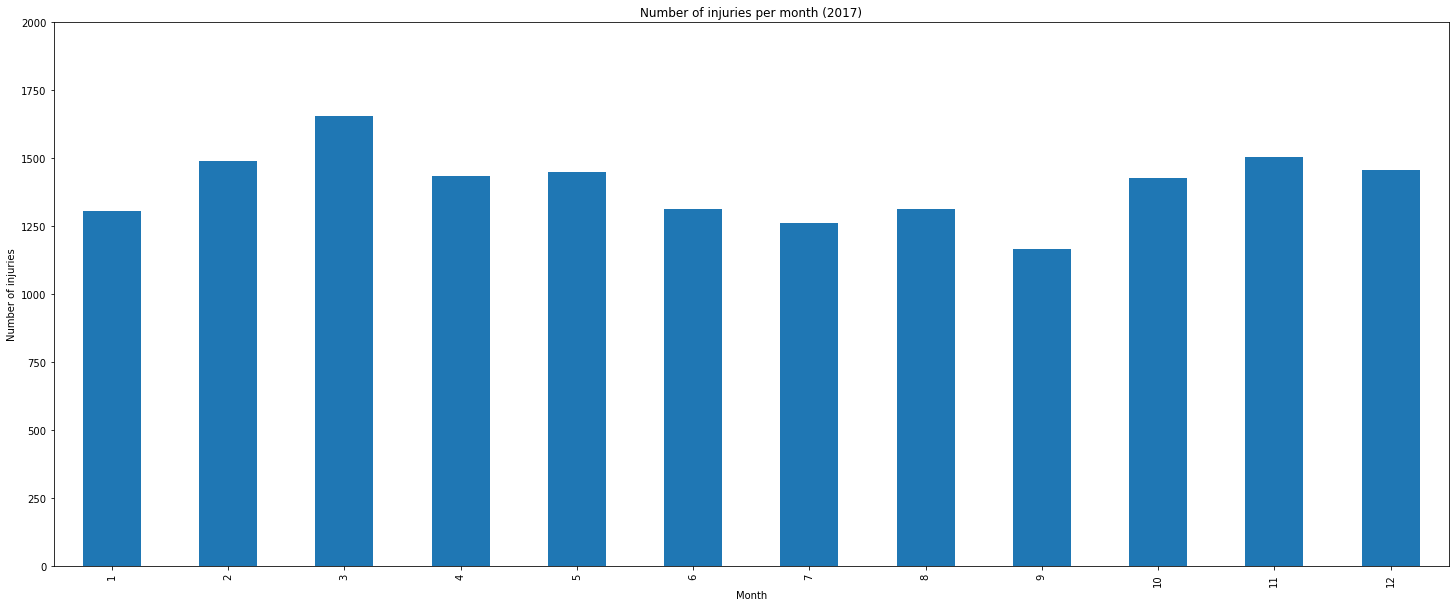

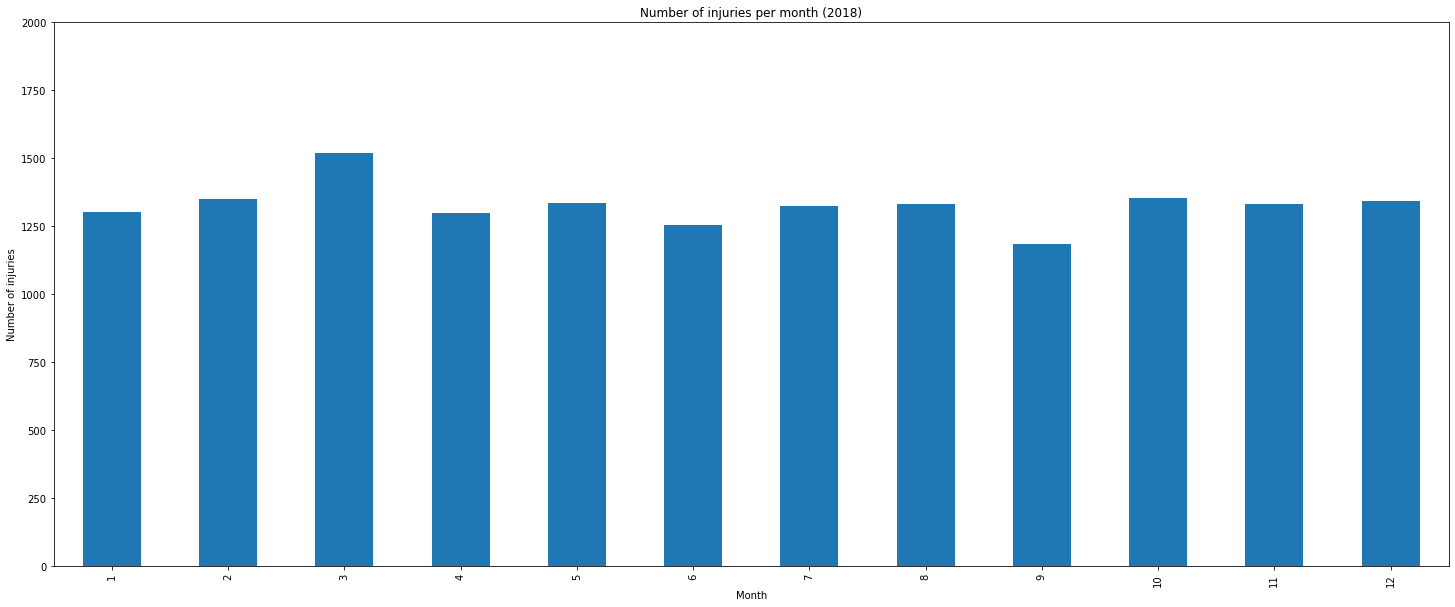

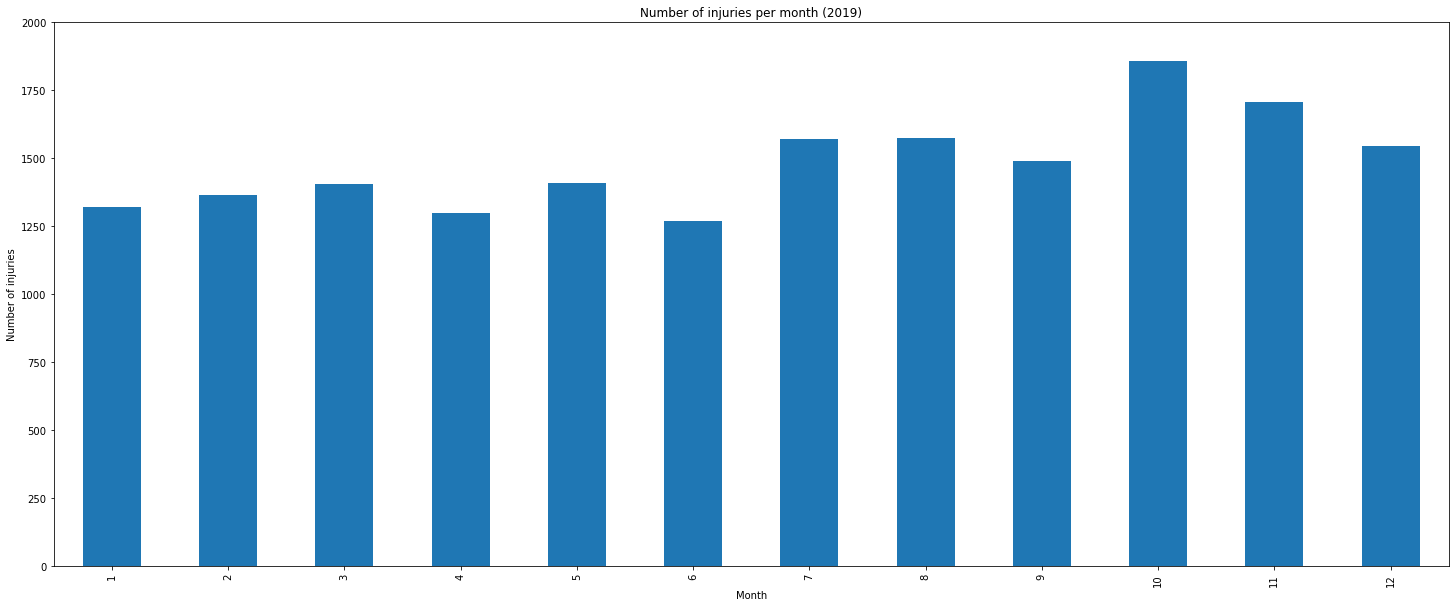

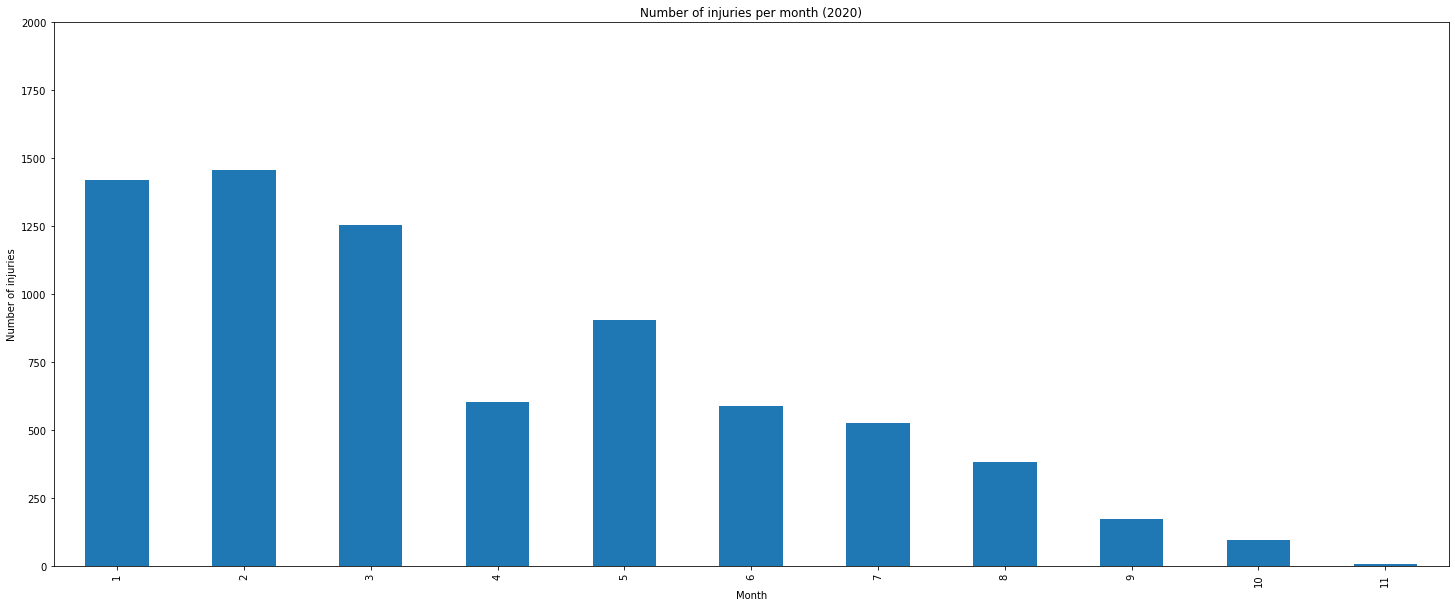

In [65]:
#months 

plt.figure(figsize=(25, 10))
sum_df_months["Number_of_injuries"][2016].plot(kind="bar")
plt.title("Number of injuries per month (2016)")
plt.xlabel("Month")
plt.ylabel("Number of injuries")
plt.ylim(0,2000)
plt.show()

plt.figure(figsize=(25, 10))
sum_df_months["Number_of_injuries"][2017].plot(kind="bar")
plt.title("Number of injuries per month (2017)")
plt.xlabel("Month")
plt.ylabel("Number of injuries")
plt.ylim(0,2000)
plt.show()

plt.figure(figsize=(25, 10))
sum_df_months["Number_of_injuries"][2018].plot(kind="bar")
plt.title("Number of injuries per month (2018)")
plt.xlabel("Month")
plt.ylabel("Number of injuries")
plt.ylim(0,2000)
plt.show()

plt.figure(figsize=(25, 10))
sum_df_months["Number_of_injuries"][2019].plot(kind="bar")
plt.title("Number of injuries per month (2019)")
plt.xlabel("Month")
plt.ylabel("Number of injuries")
plt.ylim(0,2000)
plt.show()

plt.figure(figsize=(25, 10))
sum_df_months["Number_of_injuries"][2020].plot(kind="bar")
plt.title("Number of injuries per month (2020)")
plt.xlabel("Month")
plt.ylabel("Number of injuries")
plt.ylim(0,2000)
plt.show()



